# Machine Learning with XGBoost: Mushroom Classification

In [1]:
# Importing a library for data manipulation.

import pandas as pd

# Importing libraries for data visualization.

import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning.

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

## Data Collection

In [2]:
# Reading data into a Pandas DataFrame.

data = pd.read_csv("Data.csv")

In [3]:
# Printing first five rows of data.

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Cleaning

In [4]:
# Printing number of missing values in each column.

data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
# Printing a concise summary of data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Feature Engineering

In [6]:
# Building a label encoder.

encoder = LabelEncoder()

In [7]:
# Encoding labels for class column.

data["class"] = encoder.fit_transform(data["class"])

In [8]:
# Converting categorical columns into dummy variables.

data = pd.get_dummies(data, data.select_dtypes("object").columns, drop_first=True)

## Feature Selection

In [9]:
# Assigning feature matrix.

X = data.drop("class", axis=1)

# Assigning target vector.

y = data["class"]

In [10]:
# Printing feature matrix shape.

print("Feature Matrix Shape:", X.shape)

# Printing target vector shape.

print("Target Vector Shape:", y.shape)

Feature Matrix Shape: (8124, 95)
Target Vector Shape: (8124,)


## Machine Learning

In [11]:
# Splitting data into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
# Building a XGBoost classifier model.

model = XGBClassifier()

# Fitting model on training set.

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
# Predicting labels for testing set.

y_prediction = model.predict(X_test)

In [14]:
# Printing accuracy score.

print("Accuracy Score:", accuracy_score(y_test, y_prediction))

Accuracy Score: 1.0


In [15]:
# Printing a report of main classification metrics.

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



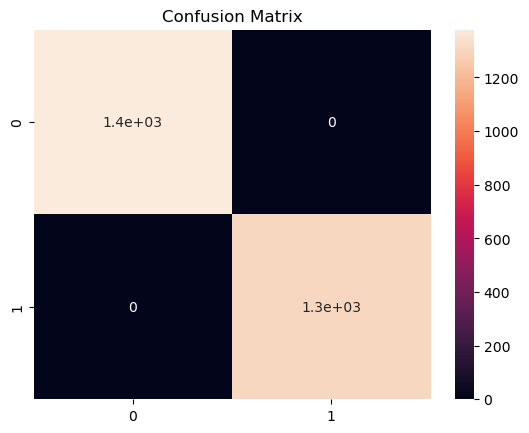

In [16]:
# Plotting a heatmap for confusion matrix.

sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True)
plt.title("Confusion Matrix")
plt.show()